In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Elementwise operations

### Basic Operations

In [3]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [4]:
a + 1

array([2, 3, 4, 5])

In [5]:
2**a

array([ 2,  4,  8, 16])

In [6]:
a**2

array([ 1,  4,  9, 16])

In [8]:
b = np.ones(4) + 1
b

array([ 2.,  2.,  2.,  2.])

In [9]:
a, b

(array([1, 2, 3, 4]), array([ 2.,  2.,  2.,  2.]))

In [10]:
a - b

array([-1.,  0.,  1.,  2.])

In [11]:
a + b

array([ 3.,  4.,  5.,  6.])

In [12]:
a * b

array([ 2.,  4.,  6.,  8.])

In [13]:
j = np.arange(5)
j

array([0, 1, 2, 3, 4])

In [14]:
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

> These operations are of course much faster than if you did them in pure python:

In [15]:
a = np.arange(10000)

In [16]:
%timeit a + 1

The slowest run took 322.69 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.88 µs per loop


In [17]:
l = range(10000)

In [18]:
%timeit [i + 1 for i in l]

1000 loops, best of 3: 579 µs per loop


> __NOTE__: Array multiplication is not matrix multiplication:

In [19]:
c = np.ones((3, 3))
c

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [21]:
c * c # NOT matrix multiplication

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [24]:
c.dot(c) # nhan ma tran - matrix multiplication

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

### Other operations

##### Comparitions

In [26]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])

In [27]:
a == b

array([False,  True, False,  True], dtype=bool)

In [28]:
a > b

array([False, False,  True, False], dtype=bool)

In [29]:
c = np.array([1, 2, 3, 4])

In [31]:
np.array_equal?
# True if two arrays have the same shape and elements, False otherwise.

In [32]:
np.array_equal(a, b), np.array_equal(a, c)

(False, True)

##### Logical Operations

In [33]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)

In [34]:
a, b

(array([ True,  True, False, False], dtype=bool),
 array([ True, False,  True, False], dtype=bool))

In [36]:
np.logical_or?
# Compute the truth value of x1 OR x2 element-wise.

In [37]:
np.logical_or(a, b), np.logical_and(a, b)

(array([ True,  True,  True, False], dtype=bool),
 array([ True, False, False, False], dtype=bool))

##### Transcendental functions

In [39]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [40]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [42]:
np.log(a)

/home/phanhoang/workspace/learning/calculation/venv/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436])

In [44]:
np.exp(a)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

##### Shape mismatches

In [45]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [46]:
a + np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

##### Transposition

In [48]:
a = np.triu?
# Upper triangle of an array.

In [59]:
# trigular upper and lower: tril
a = np.triu(np.ones((3, 3)), 1)
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [62]:
a.T

array([[ 0.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  0.]])

> __NOTE__: The transposition is a view

- As a results, the following code is wrong and will not make a matrix symmetric:

```
a += a.T
```

- It will work for small arrays (because of buffering) but fail for large one, in unpredictable ways.

In [61]:
a += a.T
a

array([[ 0.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  0.]])

In [63]:
np.allclose?

In [64]:
# np.triu and np.tril

# Basic Reductions

### Computing sums

In [65]:
x = np.array([1, 2, 3, 4])
x

array([1, 2, 3, 4])

In [67]:
np.sum?
# Sum of array elements over a given axis

In [68]:
x1 = np.ones((3, 3))
x1.sum()

9.0

In [69]:
np.sum(x), np.sum(x1)

(10, 9.0)

In [70]:
x.sum()

10

In [71]:
![axis](http://www.scipy-lectures.org/_images/reductions.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [73]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [75]:
x.sum(axis=0) # theo chieu doc

array([3, 3])

In [76]:
x.sum(axis=1) # theo chieu ngang

array([2, 4])

In [77]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [78]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

In [79]:
x = np.random.rand(2, 2, 2)
x

array([[[ 0.520526  ,  0.48068215],
        [ 0.60752741,  0.22792635]],

       [[ 0.98884473,  0.5910336 ],
        [ 0.5026723 ,  0.46896847]]])

In [84]:
np.random.rand?
# 2 hang, 2 cot, 2 matran, so chieu la 3

# Random values in a given shape.

# Create an array of the given shape and populate it with
# random samples from a uniform distribution
# over ``[0, 1)``.

In [85]:
x.sum(axis=2)[0, 1]

0.83545376588186793

In [86]:
x[0, 1, :].sum()

0.83545376588186793

### Other Reductions

In [87]:
x = np.array([1, 3, 2])
x

array([1, 3, 2])

In [89]:
x.min?

# Return the minimum along a given axis.

# Refer to `numpy.amin` for full documentation.


In [92]:
np.amin?

# Return the minimum of an array or minimum along an axis.

In [93]:
x.min()

1

In [94]:
x.max()

3

In [96]:
x.argmin?

# index of minimum

In [97]:
x.argmin()

0

In [98]:
x.argmax()

1

### Logical Operations

In [99]:
np.all([True, True, False])

False

In [101]:
np.all?

# Test whether all array elements along a given axis evaluate to True.

In [103]:
np.any([True, True, False])

True

In [107]:
np.any?

# Test whether any array element along a given axis evaluates to True.

In [108]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])

In [109]:
a, b, c

(array([1, 2, 3, 2]), array([2, 2, 3, 2]), array([6, 4, 4, 5]))

In [110]:
((a <= b) & (b <= c)).all()

True

In [113]:
d = (a <= b)

In [114]:
e = (b <= c)

In [115]:
d, e

(array([ True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True], dtype=bool))

In [116]:
d & e

array([ True,  True,  True,  True], dtype=bool)

In [117]:
(d & e).all()

True

In [118]:
a = np.zeros((100, 100))
a

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [119]:
a.size, a.shape

(10000, (100, 100))

In [120]:
np.any(a != 0)

False

In [121]:
np.all(a == a)

True

### Statistics

In [124]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])

In [126]:
x

array([1, 2, 3, 1])

In [127]:
y

array([[1, 2, 3],
       [5, 6, 1]])

In [130]:
np.mean?

# Returns the average of the array elements along given axis.

In [131]:
x.mean()

1.75

In [134]:
np.median?

# Compute the median along the specified axis.

# Returns the median of the array elements.

In [135]:
x

array([1, 2, 3, 1])

In [136]:
np.median(x)

1.5

In [137]:
np.median(y, axis=-1)

array([ 2.,  5.])

In [139]:
x.std?

# Returns the standard deviation of the array elements along given axis.

In [140]:
x.std()

0.82915619758884995

In [141]:
!cat data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


Data in populations.txt describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years.

In [142]:
data = np.load?

In [143]:
data = np.loadtxt?

In [144]:
# Each row in the text file must have the same number of values.
data = np.loadtxt('data/populations.txt')
data

array([[  1900.,  30000.,   4000.,  48300.],
       [  1901.,  47200.,   6100.,  48200.],
       [  1902.,  70200.,   9800.,  41500.],
       [  1903.,  77400.,  35200.,  38200.],
       [  1904.,  36300.,  59400.,  40600.],
       [  1905.,  20600.,  41700.,  39800.],
       [  1906.,  18100.,  19000.,  38600.],
       [  1907.,  21400.,  13000.,  42300.],
       [  1908.,  22000.,   8300.,  44500.],
       [  1909.,  25400.,   9100.,  42100.],
       [  1910.,  27100.,   7400.,  46000.],
       [  1911.,  40300.,   8000.,  46800.],
       [  1912.,  57000.,  12300.,  43800.],
       [  1913.,  76600.,  19500.,  40900.],
       [  1914.,  52300.,  45700.,  39400.],
       [  1915.,  19500.,  51100.,  39000.],
       [  1916.,  11200.,  29700.,  36700.],
       [  1917.,   7600.,  15800.,  41800.],
       [  1918.,  14600.,   9700.,  43300.],
       [  1919.,  16200.,  10100.,  41300.],
       [  1920.,  24700.,   8600.,  47300.]])

> __TRICK__: column to variables below

In [145]:
data.T

array([[  1900.,   1901.,   1902.,   1903.,   1904.,   1905.,   1906.,
          1907.,   1908.,   1909.,   1910.,   1911.,   1912.,   1913.,
          1914.,   1915.,   1916.,   1917.,   1918.,   1919.,   1920.],
       [ 30000.,  47200.,  70200.,  77400.,  36300.,  20600.,  18100.,
         21400.,  22000.,  25400.,  27100.,  40300.,  57000.,  76600.,
         52300.,  19500.,  11200.,   7600.,  14600.,  16200.,  24700.],
       [  4000.,   6100.,   9800.,  35200.,  59400.,  41700.,  19000.,
         13000.,   8300.,   9100.,   7400.,   8000.,  12300.,  19500.,
         45700.,  51100.,  29700.,  15800.,   9700.,  10100.,   8600.],
       [ 48300.,  48200.,  41500.,  38200.,  40600.,  39800.,  38600.,
         42300.,  44500.,  42100.,  46000.,  46800.,  43800.,  40900.,
         39400.,  39000.,  36700.,  41800.,  43300.,  41300.,  47300.]])

In [146]:
data.T.shape

(4, 21)

In [149]:
len(data.T) # 4 list

4

In [150]:
year, hares, lynxes, carrots = data.T

In [151]:
year

array([ 1900.,  1901.,  1902.,  1903.,  1904.,  1905.,  1906.,  1907.,
        1908.,  1909.,  1910.,  1911.,  1912.,  1913.,  1914.,  1915.,
        1916.,  1917.,  1918.,  1919.,  1920.])

In [152]:
hares

array([ 30000.,  47200.,  70200.,  77400.,  36300.,  20600.,  18100.,
        21400.,  22000.,  25400.,  27100.,  40300.,  57000.,  76600.,
        52300.,  19500.,  11200.,   7600.,  14600.,  16200.,  24700.])

In [153]:
lynxes

array([  4000.,   6100.,   9800.,  35200.,  59400.,  41700.,  19000.,
        13000.,   8300.,   9100.,   7400.,   8000.,  12300.,  19500.,
        45700.,  51100.,  29700.,  15800.,   9700.,  10100.,   8600.])

In [154]:
carrots

array([ 48300.,  48200.,  41500.,  38200.,  40600.,  39800.,  38600.,
        42300.,  44500.,  42100.,  46000.,  46800.,  43800.,  40900.,
        39400.,  39000.,  36700.,  41800.,  43300.,  41300.,  47300.])

In [155]:
from matplotlib import pyplot as plt

In [156]:
plt.axes?

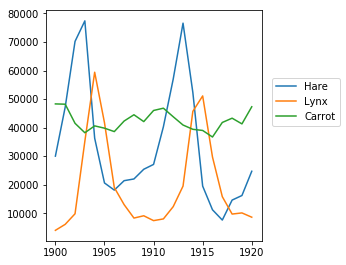

In [167]:
%matplotlib inline
plt.axes([0.2, 0.1, 0.5, 0.8]) # axes: truc
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [165]:
plt.legend?

loc : int or string or pair of floats, default: 'upper right'
    The location of the legend. Possible codes are:

        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============